## Objectives and Project Plan
- **Objective:** Realising High Income Earners in an Insurance Company above the departmental Average
  ## Project plan
  - Import Important Libraries( pyodbc, pandas, matplotlib, seaborn)
  - Connection to the SQL database
  - Run query  and Read Employee  data into data Frame
  - Inspection of Data
  - Visualization of Trends(high Income Earners)
  - Locating Image of  Visuals

 ### 1. Import Important Libraries 

In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import pyodbc

### 2. Connect to SQL database 

In [3]:
# Define connection paramters 
server = 'DESKTOP-U507UFU'
database = 'PRACTICE1'


# Create the connection string (Trusted Windows Authentication)
conn_str = (
       "Driver={SQL Server};"
    f"Server={server};"
    f"Database={database};"
    "Trusted_Connection=yes;"
)

#Establish Connection
conn = pyodbc.connect(conn_str)


### 3. Running Query and read data into DataFrame

In [12]:
query = """
SELECT e1.department_id, e1.first_name, e1.last_name, department_name, e1.salary FROM 
		insurance_employees e1
	WHERE e1.salary > (
						SELECT 
							AVG(e2.salary) As Avg_salary
							FROM insurance_employees e2 
							WHERE e2.department_id = e1.department_id
							)
	ORDER BY 
	  e1.salary DESC;

"""
df = pd.read_sql(query, conn)
conn.close()

C:\Users\User\AppData\Local\Temp\ipykernel_17700\4119250790.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


### 4. Testing Results (From the Query)

In [14]:
df.head()
#Employees Above the Average salary threshold

,department_id,first_name,last_name,department_name,salary
0,106,David,Jackson,Finance,118294.34
1,104,Richard,Johnson,Sales,117068.78
2,103,Linda,Gonzalez,Customer Service,115977.87
3,104,Jennifer,Gonzalez,Sales,113704.34
4,106,Linda,Miller,Finance,113671.42


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   department_id    23 non-null     int64  
 1   first_name       23 non-null     object 
 2   last_name        23 non-null     object 
 3   department_name  23 non-null     object 
 4   salary           23 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ KB


In [16]:
df.shape

(23, 5)

### 4. Visualizing trends (High Income Earners)

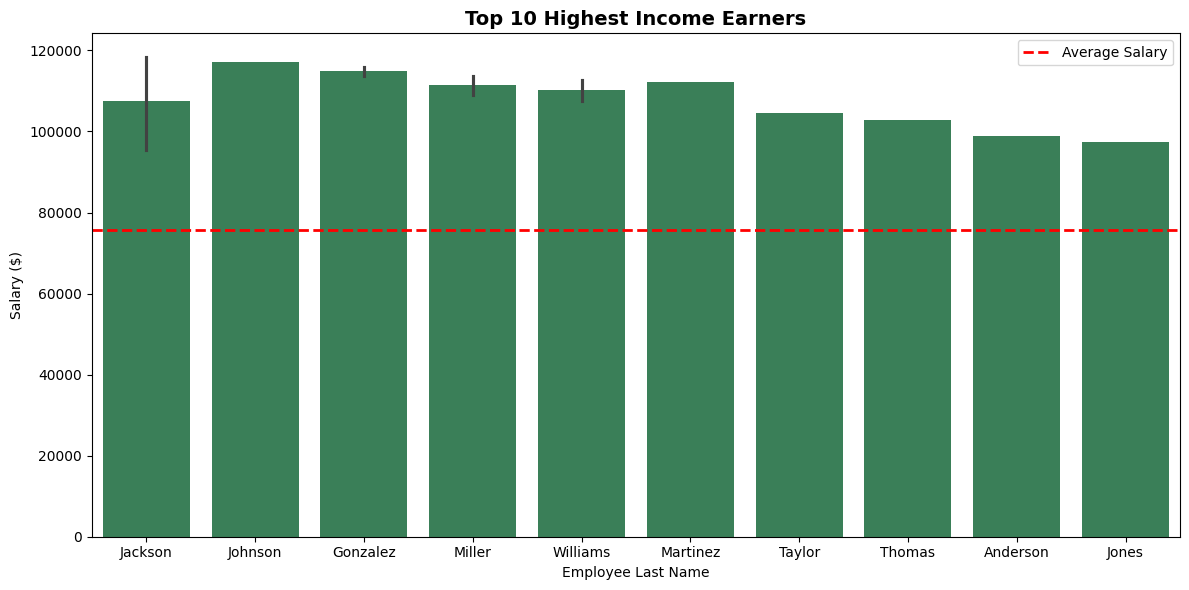

In [30]:
# --- Sort and get top 15 earners ---
top_earners = df.sort_values(by="salary", ascending=False).head(15)

# --- Create bar chart ---
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_earners,
    x="last_name",
    y="salary",
    color="seagreen"
)

# --- Add red dotted line for average salary ---
average_salary = 75776.940600
plt.axhline(y=average_salary, color='red', linestyle='--', linewidth=2, label='Average Salary')

# --- Customize plot ---
plt.title("Top 10 Highest Income Earners", fontsize=14, fontweight='bold')
plt.xlabel("Employee Last Name")
plt.ylabel("Salary ($)")
plt.legend()
plt.tight_layout()

# --- Save and Display plot ---
plt.savefig("Highest_earners.png", dpi=300, bbox_inches='tight')
plt.show()


### 5. Locating Image

In [31]:
import os
print(os.getcwd())


C:\Windows\system32\1033\Insurance_Company
